# VI.9.32

Начальные данные

In [3]:
x_arr = [1910 + 10 * i for i in range(10)]
f_arr = [92228496, 106021537, 123202624, 132164569, 151325798, 179323175, 203211926, 226545805, 248709873, 281421906]

## Интерполянт в форме Ньютона

Вычисление разделенных разностей\
$f_N = [f_{0}, f_{01}, f_{012}, ..., f_{012...N-1}],$ где $N$ - количество узлов

In [4]:
f_N = [i for i in f_arr]
N = len(x_arr)
for i in range(1, N, 1):
    for j in range(N - 1, i - 1, -1):
        f_N[j] = (f_N[j] - f_N[j - 1]) / (x_arr[j] - x_arr[j - i])

Вычисление интерполянта в точке $x$

In [5]:
def P_N(x, x_arr, f_N):
    # x - точка, в которой нужно вычислить многочлен
    # x_arr - узлы сетки
    # f_N - значения разделенных разностей
    N = len(x_arr)
    P = 0  # значение полинома в точке x
    Poly_x = 1  # множитель перед разделенной разностью в полиноме
    for i in range(N):
        if i > 0:
            Poly_x *= (x - x_arr[i - 1])
        P += f_N[i] * Poly_x
    return P

In [6]:
print(f"Экстраполированное значение численности населения в 2010 году: {P_N(2010, x_arr, f_N):.0f} человек")

Экстраполированное значение численности населения в 2010 году: 827906509 человек


Экстраполированное значение: 827 906 509\
Точное значение: 308 745 538

## Сплайн
Реализуем *естественный* сплайн

### Метод прогонки
Обозначения взяты со слайда 23 из презентации интерполяция (часть 2), N = M + 1


In [8]:
# N_pr = 3

# a_vect = [0] * N_pr
# b_vect = [0] * N_pr
# c_vect = [0] * N_pr
# d_vect = [0] * N_pr
# p_vect = [0] * N_pr
# q_vect = [0] * N_pr
# x_vect = [0] * N_pr

# a_vect = [0, 5, 1]
# b_vect = [2, 4, -3]
# c_vect = [-1, 2, 0]
# d_vect = [3, 6, 2]

# # i = 0
# p_vect[1] = -c_vect[0] / b_vect[0]
# q_vect[1] = d_vect[0] / b_vect[0]

# # i = 1, ..., N - 1
# for i in range(2, N_pr, 1):
#     p_vect[i] = -c_vect[i - 1] / (a_vect[i - 1] * p_vect[i - 1] + b_vect[i - 1])
#     q_vect[i] = (d_vect[i - 1] - a_vect[i - 1] * q_vect[i - 1]) / (a_vect[i - 1] * p_vect[i - 1] + b_vect[i - 1])

# x_vect[N_pr - 1] = (d_vect[N_pr - 1] - a_vect[N_pr - 1] * q_vect[N_pr - 1]) / (p_vect[N_pr - 1] * a_vect[N_pr - 1] + b_vect[N_pr - 1])

# for i in range(N_pr - 2, -1, -1):
#     x_vect[i] = x_vect[i + 1] * p_vect[i + 1] + q_vect[i + 1]

### Запись системы коэффициентов

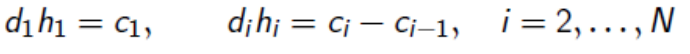
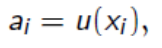
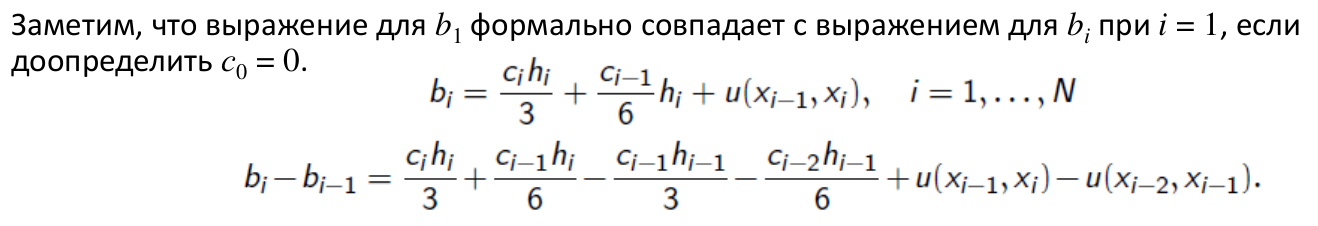
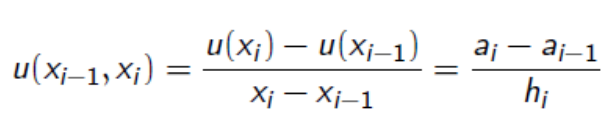
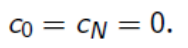\
$\text{u2\_syst[i]} = u(x_{i-1}, x_i), \; i = 1, ..., N$

In [9]:
N1 = len(x_arr)
h_syst = [0] * N1
a_syst = [0] * N1
a_syst[0] = f_arr[0]
u2_syst = [0] * N1
u3_syst = [0] * N1
for i in range(1, N1, 1):
    h_syst[i] = x_arr[i] - x_arr[i - 1]
    a_syst[i] = f_arr[i]
    u2_syst[i] = (a_syst[i] - a_syst[i - 1]) / h_syst[i]
    if i > 1:
        u3_syst[i] = (u2_syst[i] - u2_syst[i - 1]) / (h_syst[i] + h_syst[i - 1])

Метод прогонки для коэффициентов $c_1, ..., c_{N-1}$


In [10]:
c_syst = [0] * N1

# инициализация
N_pr = N1 - 2
a_vect = [0] * N_pr
b_vect = [2] * N_pr
c_vect = [0] * N_pr
d_vect = [0] * N_pr
p_vect = [0] * N_pr
q_vect = [0] * N_pr
x_vect = [0] * N_pr

for i in range(N_pr):
    d_vect[i] = u3_syst[i + 2]
    if i > 0:
        a_vect[i] = h_syst[i] / (h_syst[i] + h_syst[i + 1])
    if i < N_pr - 1:
        c_vect[i] = h_syst[i + 2] / (h_syst[i + 1] + h_syst[i + 2])

# поиск коэффициентов
# i = 0
p_vect[1] = -c_vect[0] / b_vect[0]
q_vect[1] = d_vect[0] / b_vect[0]

# i = 1, ..., N - 1
for i in range(2, N_pr, 1):
    p_vect[i] = -c_vect[i - 1] / (a_vect[i - 1] * p_vect[i - 1] + b_vect[i - 1])
    q_vect[i] = (d_vect[i - 1] - a_vect[i - 1] * q_vect[i - 1]) / (a_vect[i - 1] * p_vect[i - 1] + b_vect[i - 1])

# поиск решения
x_vect[N_pr - 1] = (d_vect[N_pr - 1] - a_vect[N_pr - 1] * q_vect[N_pr - 1]) / (p_vect[N_pr - 1] * a_vect[N_pr - 1] + b_vect[N_pr - 1])

for i in range(N_pr - 2, -1, -1):
    x_vect[i] = x_vect[i + 1] * p_vect[i + 1] + q_vect[i + 1]

for i in range(1, N1 - 1, 1):
    c_syst[i] = x_vect[i - 1]

Коэффициенты $c$ найдены. Ищем остальные

In [11]:
d_syst = [0] * N1
d_syst[1] = c_syst[1] / h_syst[1]
for i in range(2, N1, 1):
    d_syst[i] = (c_syst[i] - c_syst[i - 1]) / h_syst[i]

b_syst = [0] * N1
for i in range(1, N1, 1):
    b_syst[i] = c_syst[i] * h_syst[i] / 3 + c_syst[i - 1] * h_syst[i] / 6 + u2_syst[i]

Строим полином

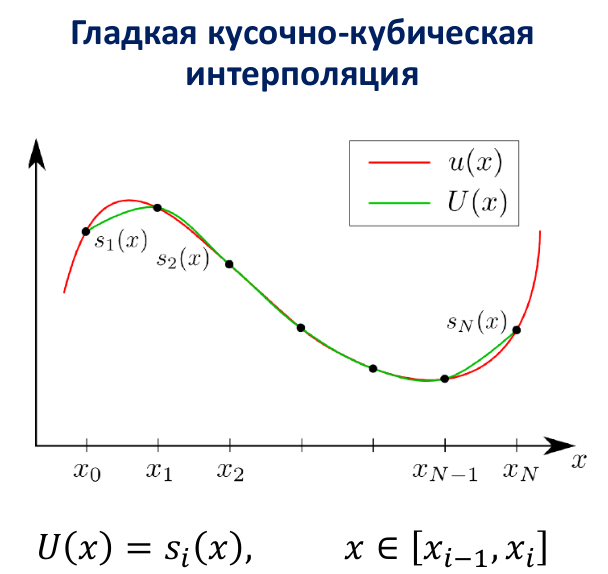
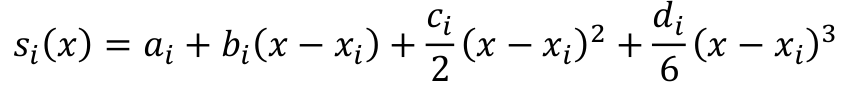

In [12]:
def U_spline(x, x_arr, a, b, c, d):
    # x - точка, в которой нужно вычислить многочлен
    # x_arr - узлы сетки
    # a, b, c, d - коэффициенты
    i = 0
    if x < x_arr[1]:
        i = 1
    elif x > x_arr[-1]:
        i = -1
    else:
        for k in range(1, len(x_arr), 1):
            if x_arr[k - 1] <= x and x <= x_arr[k]:
                i = k
                break
    return a[i] + b[i] * (x - x_arr[i]) + c[i] / 2 * (x - x_arr[i]) ** 2 + d[i] / 6 * (x - x_arr[i]) ** 3

In [13]:
print(f"Экстраполированное сплайном значение численности населения в 2010 году: {U_spline(2010, x_arr, a_syst, b_syst, c_syst, d_syst):.0f} человек")

Экстраполированное сплайном значение численности населения в 2010 году: 314133939 человек


Экстраполированное значение: 314 133 939\
Точное значение: 308 745 538

## Сравнение метода Ньютона и сплайна

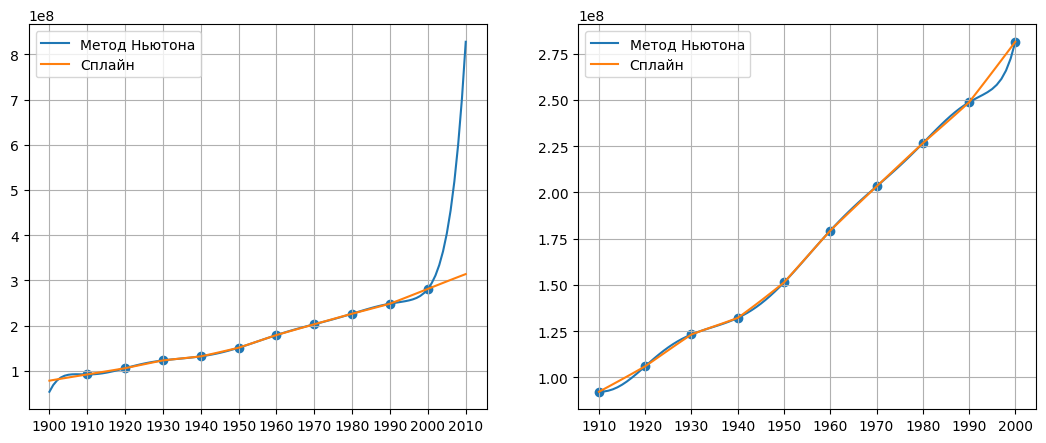

In [27]:
import matplotlib.pyplot as plt


x_graph = [1900 + i for i in range(111)]
y_graph_N = [P_N(i, x_arr, f_N) for i in x_graph]
y_graph_S = [U_spline(i, x_arr, a_syst, b_syst, c_syst, d_syst) for i in x_graph]

plt.figure(figsize=(13, 5))

plt.subplot(1, 2, 1)
plt.plot(x_graph, y_graph_N, label="Метод Ньютона")
plt.plot(x_graph, y_graph_S, label="Сплайн")
plt.scatter(x_arr, f_arr)
plt.xticks(x_arr + [1900, 2010])
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
start = 10
end = -10
plt.plot(x_graph[start:end], y_graph_N[start:end], label="Метод Ньютона")
plt.plot(x_graph[start:end], y_graph_S[start:end], label="Сплайн")
plt.scatter(x_arr, f_arr)
plt.xticks(x_arr)
plt.legend()
plt.grid()

## Вывод
Экстраполированное значение методом Ньютона: 827 906 509\
Экстраполированное значение сплайном: 314 133 939\
Точное значение: 308 745 538